In [1]:
from prophet import Prophet
import pandas as pd
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('numexpr').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

There are two main ways that outliers can affect Prophet forecasts. Here we make a forecast on the logged Wikipedia visits to the R page from before, but with a block of bad data:

Initial log joint probability = -28.5336
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7065.25    0.00985348       1788.39           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7268.34      0.314259       3192.57           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7388.7     0.0190484       296.906           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7445.25     0.0103843       221.488           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7464.95    0.00168051        219.62      0.1377      0.4401      573   
    Iter      log prob        ||dx||      ||grad||       alpha  

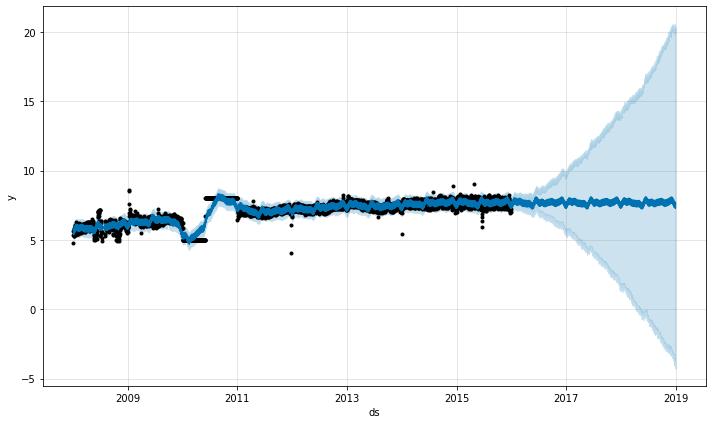

In [2]:
df = pd.read_csv('../examples/example_wp_log_R_outliers1.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)

The trend forecast seems reasonable, but the uncertainty intervals seem way too wide. Prophet is able to handle the outliers in the history, but only by fitting them with trend changes. The uncertainty model then expects future trend changes of similar magnitude.

The best way to handle outliers is to remove them - Prophet has no problem with missing data. If you set their values to `NA` in the history but leave the dates in `future`, then Prophet will give you a prediction for their values.

Initial log joint probability = -21.2638
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       7988.79    0.00258256       514.578           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8003.89   0.000620109       240.419      0.6428      0.6428      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       8004.36   1.75337e-05       96.4894   8.142e-08       0.001      324  LS failed, Hessian reset 
     254       8004.79   1.41432e-05       112.016   1.319e-07       0.001      403  LS failed, Hessian reset 
     299       8005.05   6.09438e-05       46.0784      0.8956      0.8956      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  #

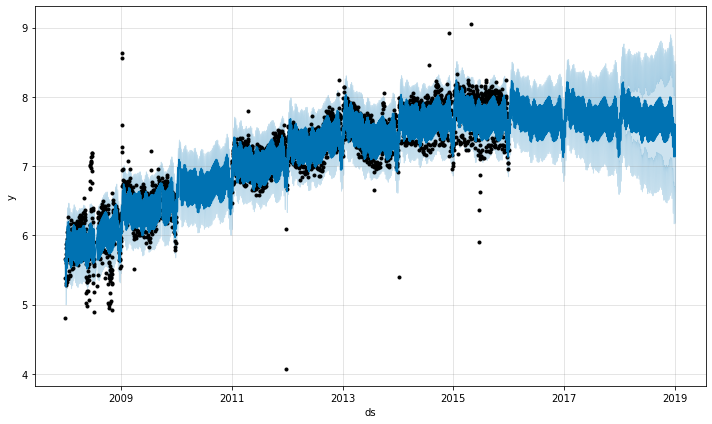

In [3]:
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model = Prophet().fit(df)
fig = model.plot(model.predict(future))

In the above example the outliers messed up the uncertainty estimation but did not impact the main forecast `yhat`. This isn't always the case, as in this example with added outliers:

Initial log joint probability = -27.5907
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       6936.51   0.000716031       92.1912      0.9102      0.9102      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       6938.13   0.000129443       203.215   4.992e-07       0.001      282  LS failed, Hessian reset 
     199       6938.88   0.000285026       64.9446      0.2711           1      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       6938.96   5.61175e-05       93.3589   5.029e-07       0.001      383  LS failed, Hessian reset 
     271       6938.99   8.10249e-05       62.4722   1.093e-06       0.001      486  LS failed, Hessian reset 
     299       6938.99   1.10183e-06       62.3459   

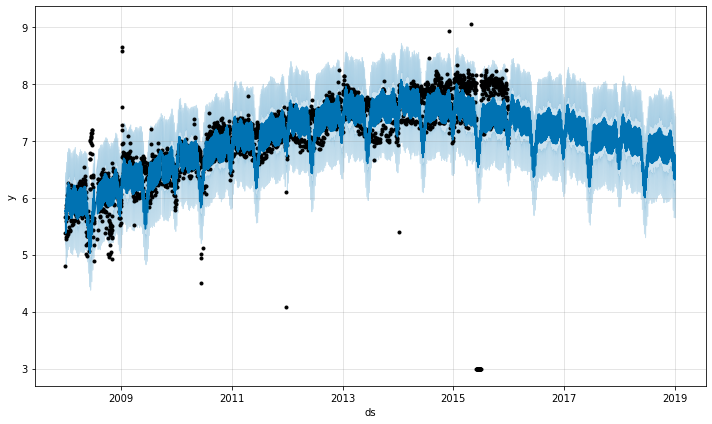

In [4]:
df = pd.read_csv('../examples/example_wp_log_R_outliers2.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)

Here a group of extreme outliers in June 2015 mess up the seasonality estimate, so their effect reverberates into the future forever. Again the right approach is to remove them:

Initial log joint probability = -24.7625
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9051.54    0.00276269       668.393           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9065.63   0.000187939       171.081      0.1285      0.2954      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9068.43   0.000932769       165.088      0.3182           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9071.81    0.00176905       232.876      0.9677      0.9677      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     472       9072.67   3.42277e-05       163.909   4.398e-07       0.001      609  LS failed, Hessian reset 
     499        9072.8   0.000456014    

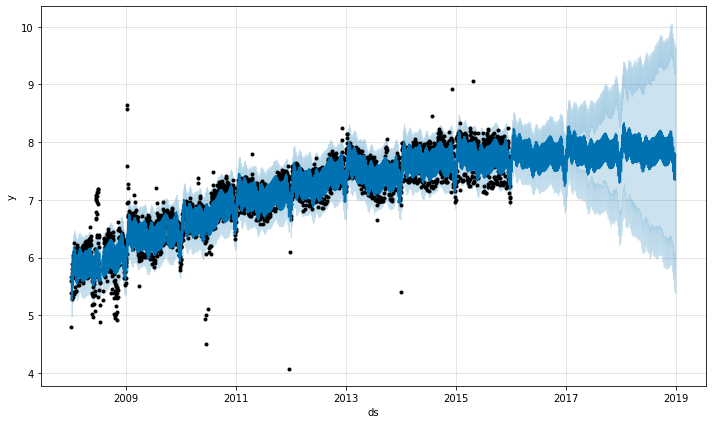

In [5]:
df.loc[(df['ds'] > '2015-06-01') & (df['ds'] < '2015-06-30'), 'y'] = None
m = Prophet().fit(df)
fig = m.plot(m.predict(future))